# House Pricing(Regression)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, recall_score,confusion_matrix, mean_squared_error, mean_absolute_error, r2_score

# Step 2: Load and Explore the Dataset
Hint: Use `fetch_california_housing` to load the dataset. Explore the dataset using `head()`.

In [ ]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#Data Preprocessing

In [ ]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [ ]:
df.duplicated().sum()

0

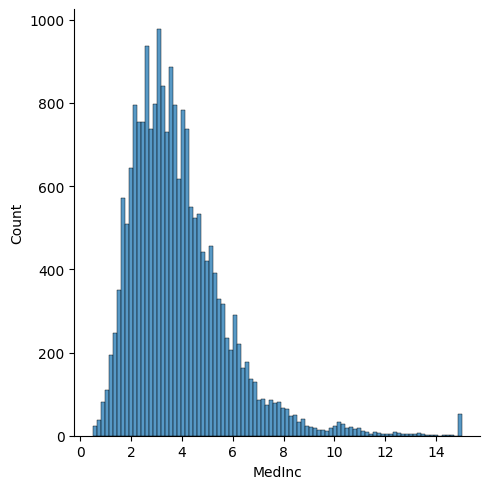

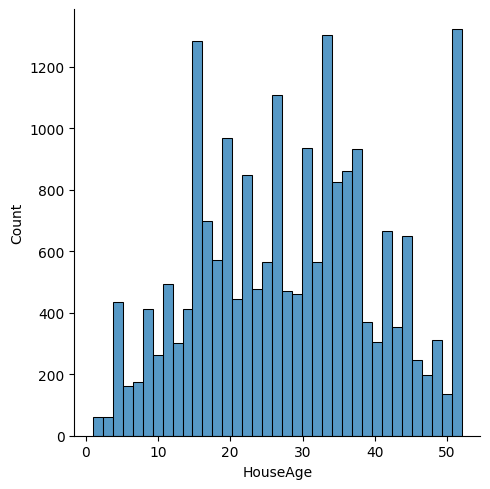

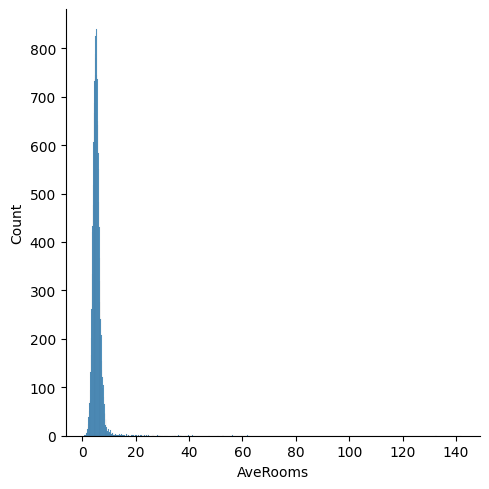

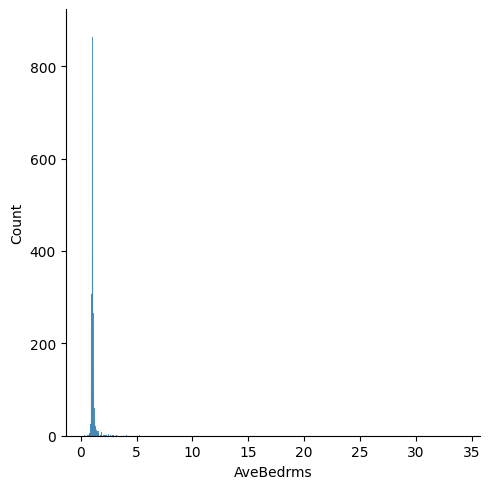

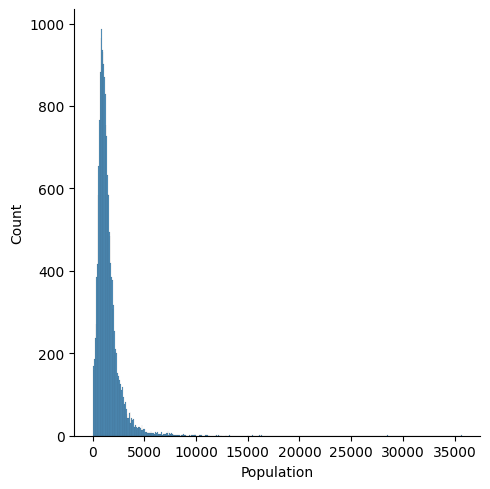

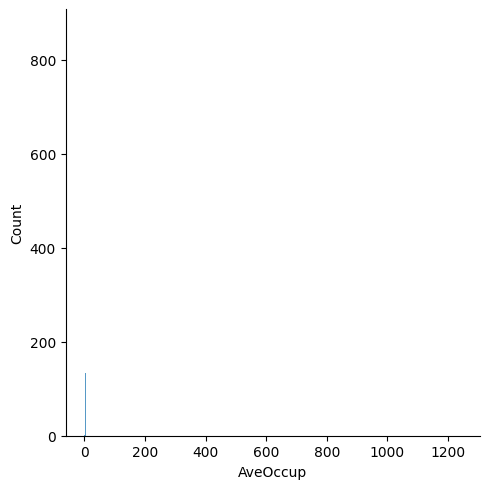

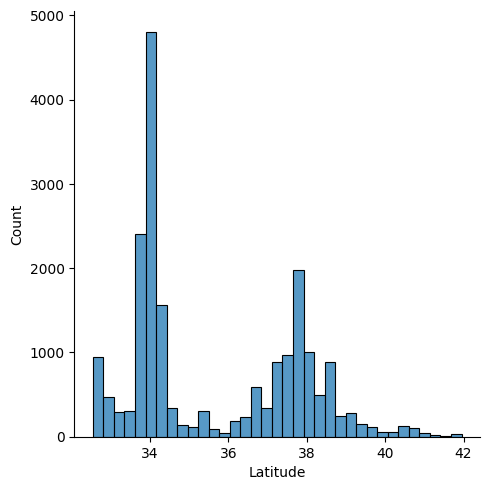

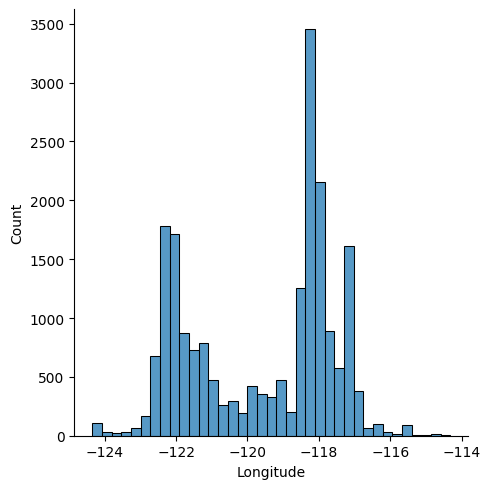

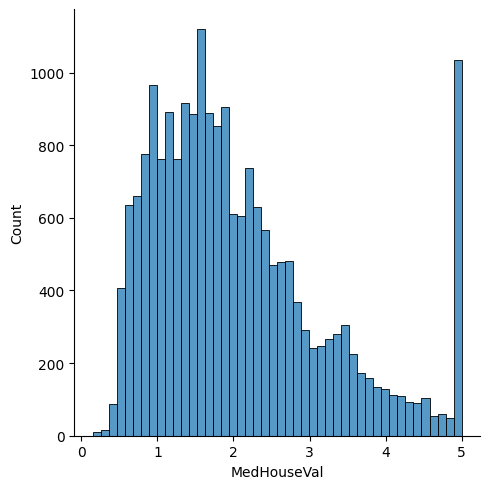

In [ ]:
for col in df:
  sns.displot(df[col])
  plt.show()

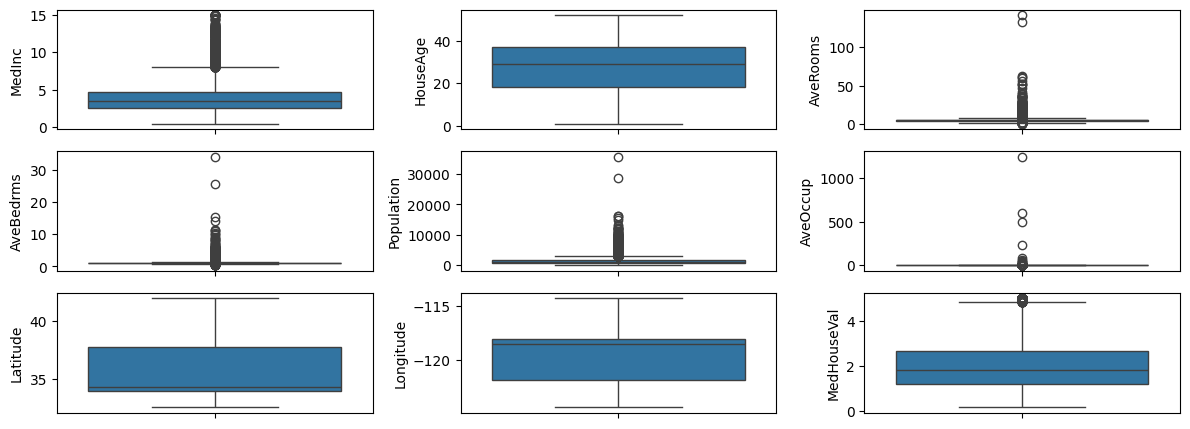

In [ ]:
x = 1
plt.figure(figsize=(12, 10))
for col in df:
    plt.subplot(7, 3, x)
    sns.boxplot(df[col])
    x += 1

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [ ]:
x=df.drop('MedHouseVal',axis=1)
y=df['MedHouseVal']

##Handle outlier in Preprocessing

In [ ]:
x.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
from scipy.stats import zscore

In [ ]:
for col in x.columns:
  x['Z_Score'] = zscore(x[col])
  threshold = 3
  lower_bound = x[col].mean() - threshold * x[col].std()
  upper_bound = x[col].mean() + threshold * x[col].std()
  x[col] = x[col].clip(lower=lower_bound, upper=upper_bound)
  x.drop(columns='Z_Score', inplace=True)

In [ ]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


#Train & test your models

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


## Step 5: Scale the Features
Hint: Use `StandardScaler` to scale the features for better model performance.

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
x.shape

(20640, 8)

#Build the Regression Model

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

#Predict the output of new values

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([0.48851973, 1.79925496, 3.11104434, ..., 4.70004419, 1.17452775,
       1.9147935 ])

# visualizes the dataset after performing the model (predicted results VS. actual results).

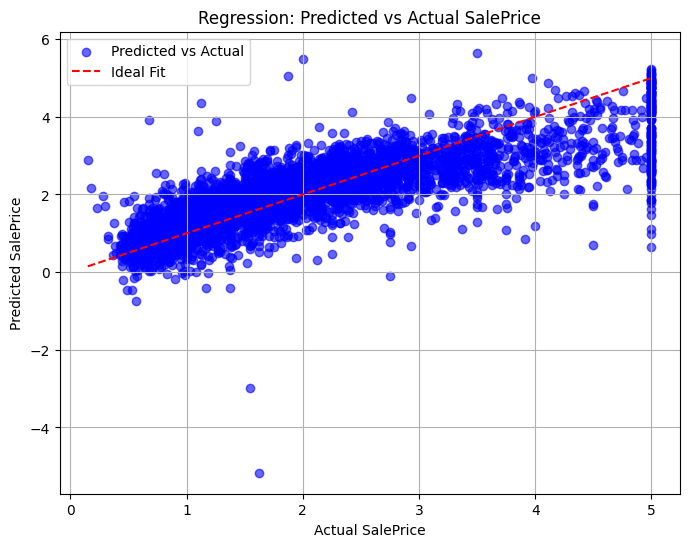

In [ ]:
# Scatter plot for predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Regression: Predicted vs Actual SalePrice")
plt.legend()
plt.grid(True)
plt.show()

#Evaluate your model (Use confusion matrix and accuracy for classification problem and R square and MAE / RMSE for regression problem)

In [ ]:
# Evaluate regression model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Regression Evaluation:")
print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}")

Regression Evaluation:
RMSE: 0.70, MAE: 0.50, R2: 0.63
